# Exploratory Data Analysis

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cleaned/cleaned_coffee-sales.csv')
df

,Unnamed: 0,Date,Transaction Date,Transaction Type,Price,Coffee Order
0,0,2025-02-08,2025-02-08 14:26:04,cash,15.0,Tea
1,1,2025-02-08,2025-02-08 14:28:26,cash,15.0,Tea
2,2,2025-02-08,2025-02-08 14:33:04,card,20.0,Espresso
3,3,2025-02-08,2025-02-08 15:51:04,card,30.0,Chocolate with coffee
4,4,2025-02-08,2025-02-08 16:35:01,cash,27.0,Chocolate with milk
...,...,...,...,...,...,...
257,257,2025-03-23,2025-03-23 14:55:46,cash,30.0,Cappuccino
258,258,2025-03-23,2025-03-23 15:15:36,card,25.0,Irish whiskey
259,259,2025-03-23,2025-03-23 17:59:25,card,28.0,Super chocolate
260,260,2025-03-23,2025-03-23 18:01:33,card,28.0,Vanilla with Irish whiskey


## Most Popular Coffee Order

Unnamed: 0                   int64
Date                datetime64[ns]
Transaction Date            object
Transaction Type            object
Price                      float64
Coffee Order                object
Week                        UInt32
Month                       object
dtype: object


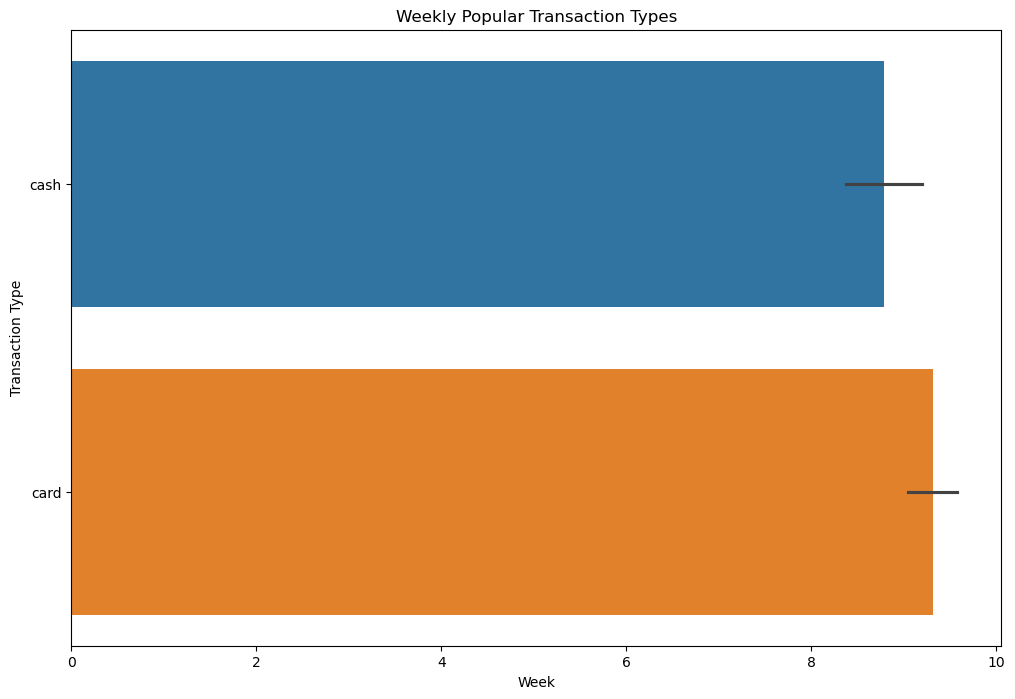

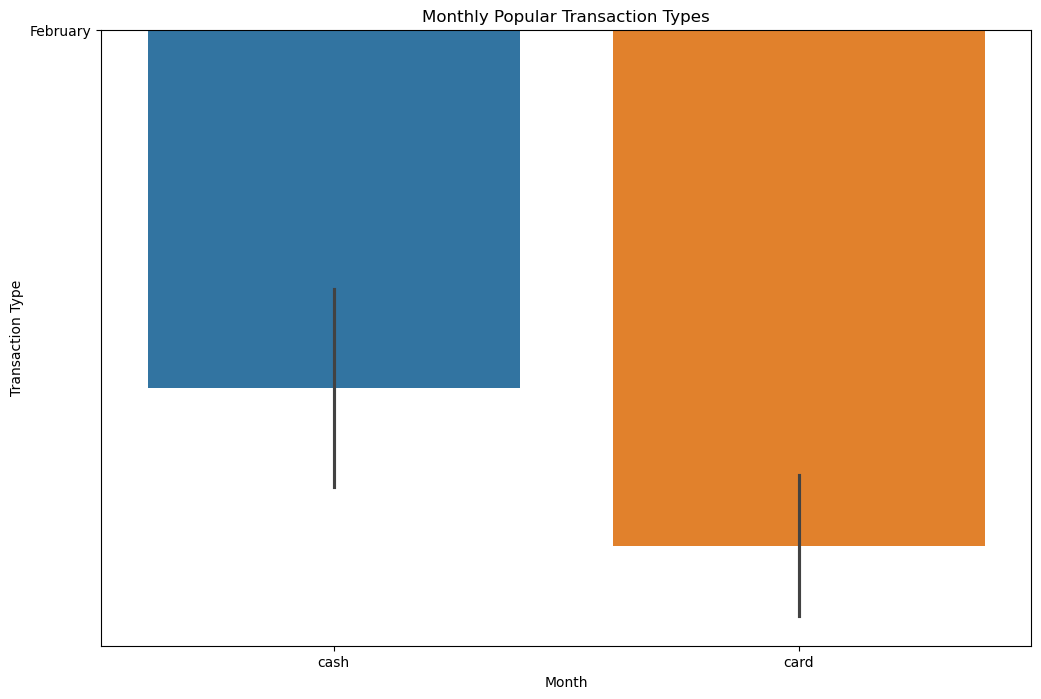

In [56]:
df["Date"] = pd.to_datetime(df["Date"])
# weekly trends
df["Week"] = df["Date"].dt.to_period("W")
df["Week"] = pd.to_datetime(df["Date"], errors="coerce").dt.isocalendar().week

# monthly trends
df["Month"] = df["Date"].dt.to_period("M")
df["Month"] = pd.to_datetime(df["Date"], errors="coerce").dt.month_name()

print(df.dtypes)

weekly_summary = (
    df.groupby(["Transaction Type", "Week"])
    .size()
    .reset_index(name="count")
)


monthly_summary = (
    df.groupby(["Transaction Type", "Month"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(12, 8))
sns.barplot(data=df, y="Transaction Type", x="Week", hue="Transaction Type")
plt.title("Weekly Popular Transaction Types")
plt.ylabel("Transaction Type")
plt.xlabel("Week")
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(data=df, x="Transaction Type", y="Month", hue="Transaction Type")
plt.title("Monthly Popular Transaction Types")
plt.ylabel("Transaction Type")
plt.xlabel("Month")
plt.show()